# Auto Regressor Model by Mr. Harshit Dawar
* This is the basic fundamental which should be clear before implementing RNN.
* It is the backbone of the correct/right Forecast which is required by RNN.

## Importing the required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

## Generating Sample Data without Noise

In [2]:
timeSeriesData = np.sin(0.1 * np.arange(200))

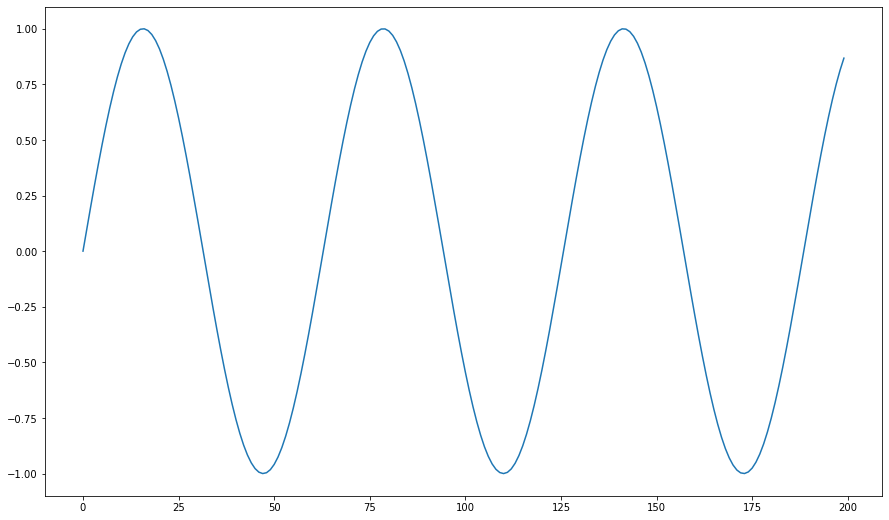

In [3]:
plt.figure(figsize = (15, 9))
plt.plot(timeSeriesData)
plt.show()

### Generating Forecast Data without Noise

In [4]:
T = 10
data = []
forecast = []

for t in range(len(timeSeriesData) - T):
    data.append(timeSeriesData[t : t + T])
    forecast.append(timeSeriesData[t + T])
    
data, forecast  = np.array(data), np.array(forecast)

In [5]:
data.shape, forecast.shape

((190, 10), (190,))

### AutoRegression Model with wrong approach of Forecast

* ***Note: Below One ANN is created, but any Neural network without an activation function will act as an Linear Model i.e. Linear Regression in the present case***

In [6]:
inputShape = Input(shape = (T, ))
outputLayer = Dense(1)(inputShape)

model = Model(inputShape, outputLayer)
model.compile(loss = "mse", optimiser = Adam(lr = 0.01))

In [7]:
trainedModel = model.fit(data[:data.shape[0] // 2],
                         forecast[:forecast.shape[0] // 2],
                         epochs = 500,
                         validation_data = (data[-data.shape[0] // 2 : ], forecast[-forecast.shape[0] // 2 : ])
                    )

Train on 95 samples, validate on 95 samples
Epoch 1/500
95/95 [==============================] - 2s 16ms/sample - loss: 1.3421 - val_loss: 1.2914
Epoch 2/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.2675 - val_loss: 1.2387
Epoch 3/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.2180 - val_loss: 1.1968
Epoch 4/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.1766 - val_loss: 1.1591
Epoch 5/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.1400 - val_loss: 1.1249
Epoch 6/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.1061 - val_loss: 1.0932
Epoch 7/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.0748 - val_loss: 1.0633
Epoch 8/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.0454 - val_loss: 1.0348
Epoch 9/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.0180 - val_loss: 1.0088
Epoch 10/500
95/95 [==========================

Epoch 81/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.2660 - val_loss: 0.2702
Epoch 82/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.2610 - val_loss: 0.2656
Epoch 83/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.2562 - val_loss: 0.2610
Epoch 84/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.2516 - val_loss: 0.2566
Epoch 85/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.2468 - val_loss: 0.2521
Epoch 86/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.2420 - val_loss: 0.2476
Epoch 87/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.2376 - val_loss: 0.2432
Epoch 88/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.2329 - val_loss: 0.2388
Epoch 89/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.2283 - val_loss: 0.2344
Epoch 90/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.2239

95/95 [==============================] - 0s 1ms/sample - loss: 1.7524e-05 - val_loss: 9.6390e-06
Epoch 237/500
95/95 [==============================] - 0s 1ms/sample - loss: 8.1125e-06 - val_loss: 3.5163e-06
Epoch 238/500
95/95 [==============================] - 0s 1ms/sample - loss: 5.4115e-06 - val_loss: 5.9860e-06
Epoch 239/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.2129e-05 - val_loss: 1.5434e-05
Epoch 240/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.8417e-05 - val_loss: 1.9077e-05
Epoch 241/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.5897e-05 - val_loss: 8.9396e-06
Epoch 242/500
95/95 [==============================] - 0s 1ms/sample - loss: 9.8913e-06 - val_loss: 3.0848e-06
Epoch 243/500
95/95 [==============================] - 0s 1ms/sample - loss: 4.6105e-06 - val_loss: 7.1323e-06
Epoch 244/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.1461e-05 - val_loss: 1.9920e-05
Epoch 245/500
9

Epoch 310/500
95/95 [==============================] - 0s 1ms/sample - loss: 2.4355e-05 - val_loss: 7.6654e-06
Epoch 311/500
95/95 [==============================] - 0s 1ms/sample - loss: 5.9690e-06 - val_loss: 4.4812e-06
Epoch 312/500
95/95 [==============================] - 0s 1ms/sample - loss: 6.4684e-06 - val_loss: 8.1214e-06
Epoch 313/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.2835e-05 - val_loss: 2.0646e-05
Epoch 314/500
95/95 [==============================] - 0s 1ms/sample - loss: 2.0187e-05 - val_loss: 1.5440e-05
Epoch 315/500
95/95 [==============================] - 0s 1ms/sample - loss: 7.7770e-06 - val_loss: 8.1842e-06
Epoch 316/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.2665e-05 - val_loss: 6.7125e-06
Epoch 317/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.3053e-05 - val_loss: 7.5588e-06
Epoch 318/500
95/95 [==============================] - 0s 1ms/sample - loss: 7.8005e-06 - val_loss: 1.0754e-05
E

Epoch 384/500
95/95 [==============================] - 0s 1ms/sample - loss: 7.5535e-06 - val_loss: 9.1433e-06
Epoch 385/500
95/95 [==============================] - 0s 1ms/sample - loss: 6.7107e-06 - val_loss: 1.1690e-05
Epoch 386/500
95/95 [==============================] - 0s 1ms/sample - loss: 2.8373e-05 - val_loss: 5.9350e-06
Epoch 387/500
95/95 [==============================] - 0s 1ms/sample - loss: 5.2748e-06 - val_loss: 4.3056e-06
Epoch 388/500
95/95 [==============================] - 0s 1ms/sample - loss: 7.0062e-06 - val_loss: 9.2379e-06
Epoch 389/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.2332e-05 - val_loss: 1.7488e-05
Epoch 390/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.8272e-05 - val_loss: 1.7095e-05
Epoch 391/500
95/95 [==============================] - 0s 1ms/sample - loss: 1.6331e-05 - val_loss: 9.4393e-06
Epoch 392/500
95/95 [==============================] - 0s 1ms/sample - loss: 7.9779e-06 - val_loss: 8.1387e-06
E

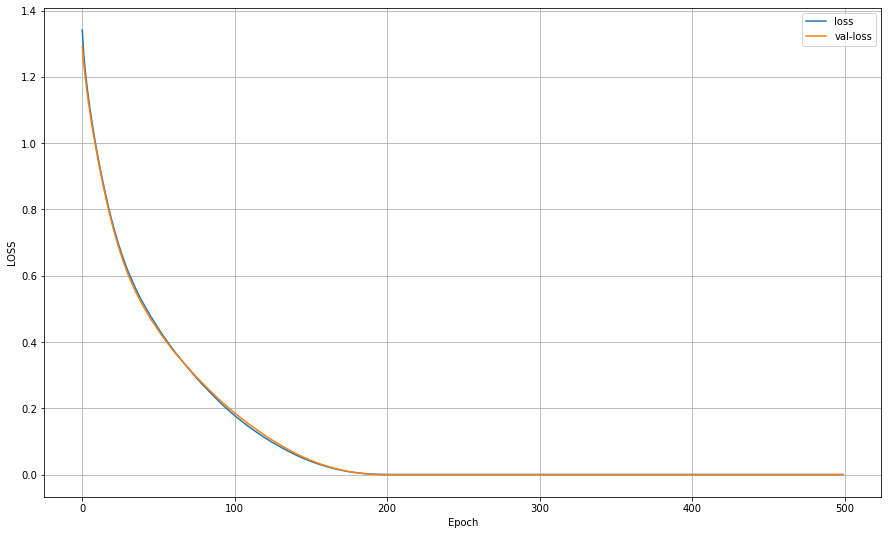

In [8]:
plt.figure(figsize = (15,9))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val-loss")
plt.xlabel("Epoch")
plt.ylabel("LOSS")
plt.legend()
plt.grid()
plt.show()

In [9]:
predictionsTargetValues = forecast[-forecast.shape[0] // 2 : ]
predictions = []

### Using the wrong approach for Forecast

In [10]:
iterator = data.shape[0] // 2
while len(predictions) < len(predictionsTargetValues):
    predictions.append(
        model.predict(data[iterator].reshape(1, -1))[0, 0]      # Converting from (10, 1) to (1, 10) becuase 10 features are expected by the Model
    )
    iterator += 1
    

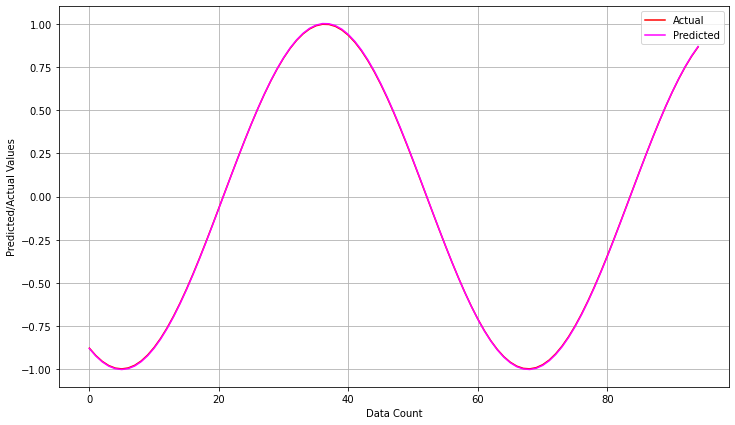

In [11]:
plt.figure(figsize = (12, 7))
plt.plot(predictionsTargetValues, label = "Actual", c = "red")
plt.plot(predictions, label = "Predicted", c = 'magenta')
plt.legend()
plt.grid()
plt.xlabel("Data Count")
plt.ylabel("Predicted/Actual Values")
plt.show()

### Using the Right forecast Approach

In [12]:
predictionsTargetValues = forecast[-forecast.shape[0] // 2 : ]
predictions = []

last_Value_Of_Data = data[-data.shape[0] // 2]
while len(predictions) < len(predictionsTargetValues):
    
    # Converting from (10, 1) to (1, 10) becuase 10 features are expected by the Model
    temp = model.predict(last_Value_Of_Data.reshape(1, -1))[0, 0]
    predictions.append(temp)
        
    # Shifting the 1st 10 predictions to left by 1 bit, & adding the prediction obtained by the model at the end
    last_Value_Of_Data = np.roll(last_Value_Of_Data, -1)
    last_Value_Of_Data[-1] = temp

In [13]:
model.predict(last_Value_Of_Data.reshape(1, -1))

array([[0.76271844]], dtype=float32)

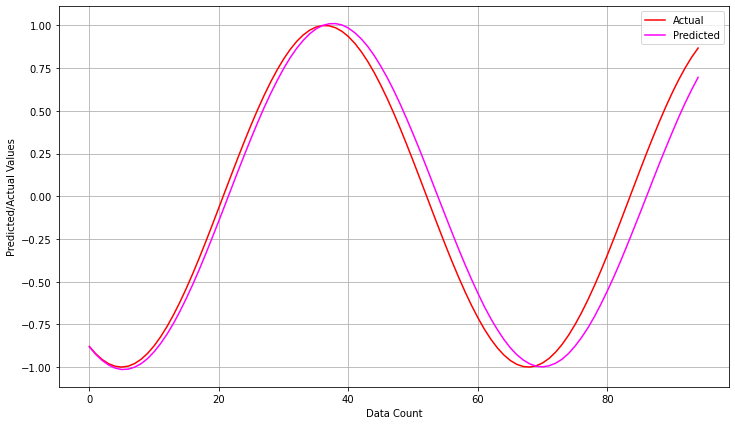

In [14]:
plt.figure(figsize = (12, 7))
plt.plot(predictionsTargetValues, label = "Actual", c = "red")
plt.plot(predictions, label = "Predicted", c = 'magenta')
plt.legend()
plt.grid()
plt.xlabel("Data Count")
plt.ylabel("Predicted/Actual Values")
plt.show()

#### Here, it can be easily spotted that when we use the right apporach, result differs! To make it more clear, one more example below is shown which will elaborate the differene between these appraoches to a more granular level by using the noisy data.

## Data with Noise

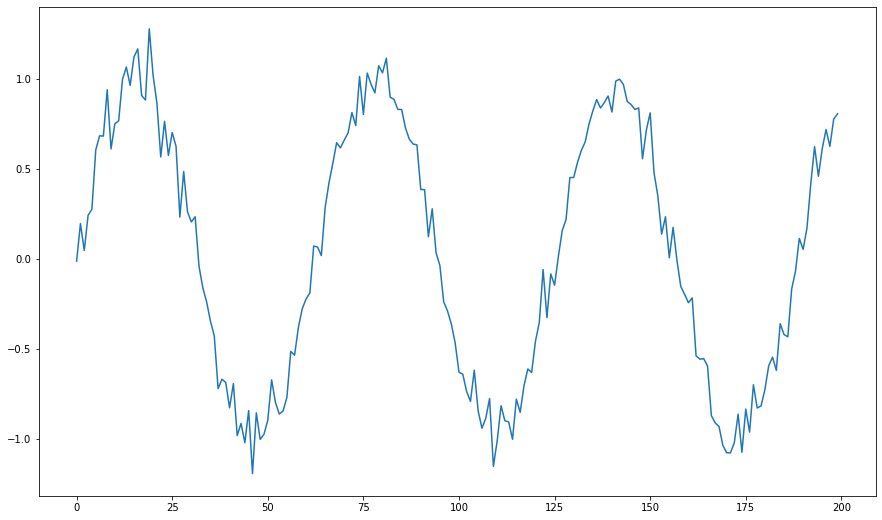

In [15]:
timeSeriesData = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1
plt.figure(figsize = (15, 9))
plt.plot(timeSeriesData)
plt.show()

In [16]:
T = 10
data = []
forecast = []

for t in range(len(timeSeriesData) - T):
    data.append(timeSeriesData[t : t + T])
    forecast.append(timeSeriesData[t + T])
    
data, forecast  = np.array(data), np.array(forecast)

In [17]:
inputShape = Input(shape = (T, ))
outputLayer = Dense(1)(inputShape)

model = Model(inputShape, outputLayer)
model.compile(loss = "mse", optimiser = Adam(lr = 0.01))

In [18]:
trainedModel = model.fit(data[:data.shape[0] // 2],
                         forecast[:forecast.shape[0] // 2],
                         epochs = 500,
                         validation_data = (data[-data.shape[0] // 2 : ], forecast[-forecast.shape[0] // 2 : ])
                    )

Train on 95 samples, validate on 95 samples
Epoch 1/500
95/95 [==============================] - 1s 10ms/sample - loss: 0.8223 - val_loss: 0.7120
Epoch 2/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.7512 - val_loss: 0.6679
Epoch 3/500
95/95 [==============================] - 0s 965us/sample - loss: 0.7021 - val_loss: 0.6302
Epoch 4/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.6605 - val_loss: 0.5974
Epoch 5/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.6242 - val_loss: 0.5679
Epoch 6/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.5909 - val_loss: 0.5400
Epoch 7/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.5599 - val_loss: 0.5141
Epoch 8/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.5307 - val_loss: 0.4895
Epoch 9/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.5033 - val_loss: 0.4661
Epoch 10/500
95/95 [========================

95/95 [==============================] - 0s 877us/sample - loss: 0.0267 - val_loss: 0.0258
Epoch 158/500
95/95 [==============================] - 0s 957us/sample - loss: 0.0268 - val_loss: 0.0258
Epoch 159/500
95/95 [==============================] - 0s 893us/sample - loss: 0.0269 - val_loss: 0.0257
Epoch 160/500
95/95 [==============================] - 0s 919us/sample - loss: 0.0265 - val_loss: 0.0257
Epoch 161/500
95/95 [==============================] - 0s 908us/sample - loss: 0.0266 - val_loss: 0.0257
Epoch 162/500
95/95 [==============================] - 0s 925us/sample - loss: 0.0266 - val_loss: 0.0256
Epoch 163/500
95/95 [==============================] - 0s 891us/sample - loss: 0.0265 - val_loss: 0.0256
Epoch 164/500
95/95 [==============================] - 0s 902us/sample - loss: 0.0266 - val_loss: 0.0256
Epoch 165/500
95/95 [==============================] - 0s 892us/sample - loss: 0.0264 - val_loss: 0.0255
Epoch 166/500
95/95 [==============================] - 0s 908us/sampl

95/95 [==============================] - 0s 911us/sample - loss: 0.0224 - val_loss: 0.0209
Epoch 314/500
95/95 [==============================] - 0s 944us/sample - loss: 0.0222 - val_loss: 0.0208
Epoch 315/500
95/95 [==============================] - 0s 871us/sample - loss: 0.0225 - val_loss: 0.0208
Epoch 316/500
95/95 [==============================] - 0s 900us/sample - loss: 0.0222 - val_loss: 0.0208
Epoch 317/500
95/95 [==============================] - 0s 876us/sample - loss: 0.0223 - val_loss: 0.0207
Epoch 318/500
95/95 [==============================] - 0s 872us/sample - loss: 0.0223 - val_loss: 0.0207
Epoch 319/500
95/95 [==============================] - 0s 903us/sample - loss: 0.0224 - val_loss: 0.0207
Epoch 320/500
95/95 [==============================] - 0s 895us/sample - loss: 0.0222 - val_loss: 0.0207
Epoch 321/500
95/95 [==============================] - 0s 924us/sample - loss: 0.0222 - val_loss: 0.0206
Epoch 322/500
95/95 [==============================] - 0s 874us/sampl

95/95 [==============================] - 0s 2ms/sample - loss: 0.0192 - val_loss: 0.0174
Epoch 470/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.0195 - val_loss: 0.0174
Epoch 471/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.0194 - val_loss: 0.0174
Epoch 472/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.0194 - val_loss: 0.0174
Epoch 473/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.0192 - val_loss: 0.0174
Epoch 474/500
95/95 [==============================] - 0s 3ms/sample - loss: 0.0192 - val_loss: 0.0174
Epoch 475/500
95/95 [==============================] - 0s 2ms/sample - loss: 0.0193 - val_loss: 0.0174
Epoch 476/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.0192 - val_loss: 0.0173
Epoch 477/500
95/95 [==============================] - 0s 1ms/sample - loss: 0.0192 - val_loss: 0.0173
Epoch 478/500
95/95 [==============================] - 0s 2ms/sample - loss: 0.0192 - v

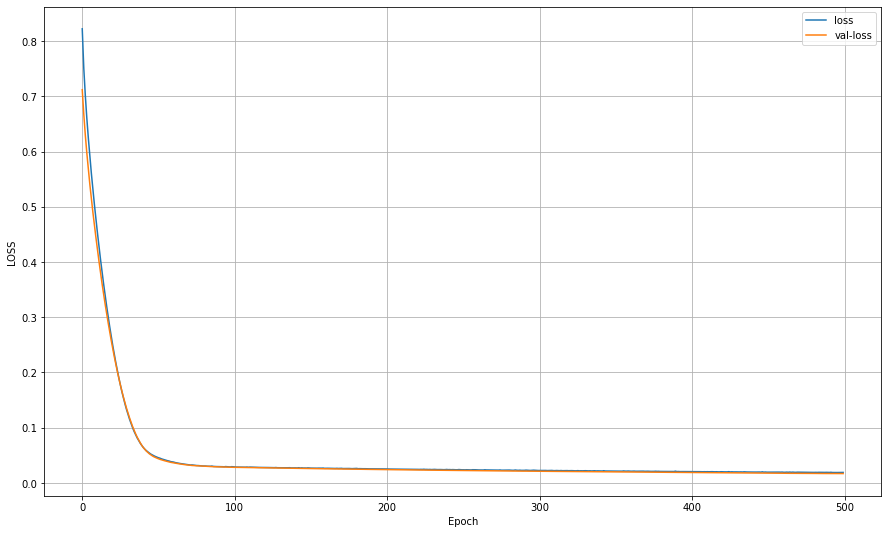

In [19]:
plt.figure(figsize = (15,9))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val-loss")
plt.xlabel("Epoch")
plt.ylabel("LOSS")
plt.legend()
plt.grid()
plt.show()

## Using the wrong Forecast Approach

In [20]:
predictionsTargetValues = forecast[-forecast.shape[0] // 2 : ]
predictions = []
iterator = data.shape[0] // 2
while len(predictions) < len(predictionsTargetValues):
    predictions.append(
        model.predict(data[iterator].reshape(1, -1))[0, 0]      # Converting from (10, 1) to (1, 10) becuase 10 features are expected by the Model
    )
    iterator += 1
    

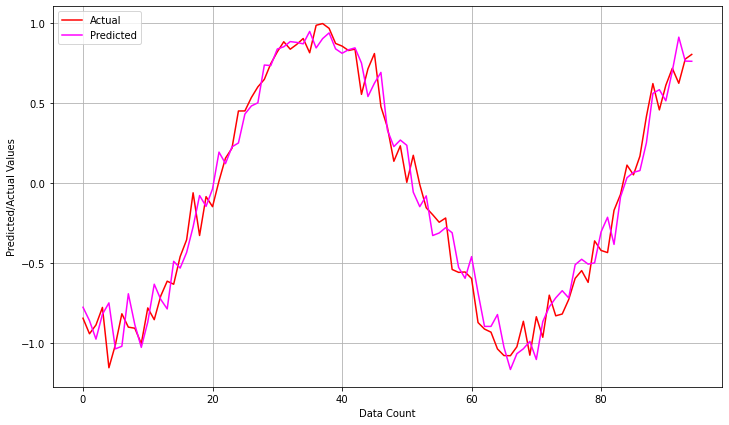

In [21]:
plt.figure(figsize = (12, 7))
plt.plot(predictionsTargetValues, label = "Actual", c = "red")
plt.plot(predictions, label = "Predicted", c = 'magenta')
plt.legend()
plt.grid()
plt.xlabel("Data Count")
plt.ylabel("Predicted/Actual Values")
plt.show()

## Using the right Forecast Approach

In [22]:
predictionsTargetValues = forecast[-forecast.shape[0] // 2 : ]
predictions = []

last_Value_Of_Data = data[-data.shape[0] // 2]
while len(predictions) < len(predictionsTargetValues):
    
    # Converting from (10, 1) to (1, 10) becuase 10 features are expected by the Model
    temp = model.predict(last_Value_Of_Data.reshape(1, -1))[0, 0]
    predictions.append(temp)
        
    # Shifting the 1st 10 predictions to left by 1 bit, & adding the prediction obtained by the model at the end
    last_Value_Of_Data = np.roll(last_Value_Of_Data, -1)
    last_Value_Of_Data[-1] = temp

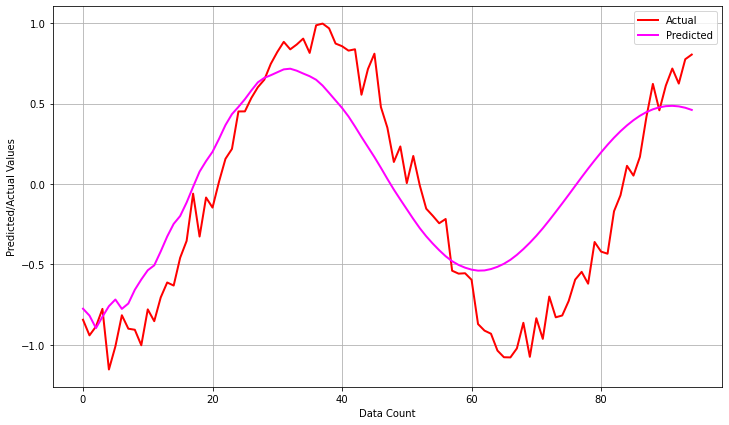

In [23]:
plt.figure(figsize = (12, 7))
plt.plot(predictionsTargetValues, label = "Actual", c = "red", linestyle = "solid", linewidth = 2)
plt.plot(predictions, label = "Predicted", c = 'magenta', linestyle = "solid", linewidth = 2)
plt.legend()
plt.grid()
plt.xlabel("Data Count")
plt.ylabel("Predicted/Actual Values")
plt.show()

# I believe now the concept is clear! Congratulations, you have understood another amazing concept which is very crucial for forecasting!